In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from loaddata import dataloader
from tcn import TCN
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.font_manager import FontProperties  # 字体管理器
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

In [2]:
batch_size = 32    # 训练批次大小
epochs = 200       # 训练epoch
filter_nums = 32   # filter数量
kernel_size = 3   # kernel大小
nb_stacks=1
dilations=[1, 2, 4, 8, 16, 32, 64]

In [3]:
# 计算第一个堆叠的receptive field
receptive_field = 1 + (kernel_size - 1) * dilations[0]

# 计算剩余堆叠的receptive field
for i in range(1, len(dilations)):
    receptive_field += (kernel_size - 1) * dilations[i]

# 将所有堆叠的receptive field相加
total_receptive_field = receptive_field * nb_stacks

print("Total receptive field:", total_receptive_field)

Total receptive field: 255


In [4]:
filename = "df_RF_final.csv"
#Whether to use sentiment, "True" or "False"
use_sentiment = True
#Which model to use, "tcn" or lstm
use_model = "tcn"
X_train, X_test, y_train, y_test, scaler, time_data = dataloader(filename, use_sentiment)

model = None
#if use_model == "tcn":
#    model = Sequential([
#        TCN(input_shape=(X_train.shape[1], X_train.shape[2])),
#        Dense(1)
#    ])
    

if use_model == "tcn":
    model = Sequential([
        TCN(input_shape=(X_train.shape[1], X_train.shape[2]),
           nb_filters=filter_nums,                   # 滤波器的个数，类比于units
        kernel_size=kernel_size,                   # 卷积核的大小
       nb_stacks=nb_stacks,
        padding='causal',
        dropout_rate=0.2,
        use_skip_connections=True, #是否要添加从输入到每个残差块的跳过连接。
        dilations=dilations),
        Dense(1)
    ])
        

elif use_model == "lstm":
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(50),
        Dense(1)
    ])


model.compile(optimizer='adam', loss='mse')

#my_callbacks = [
#        EarlyStopping(monitor='val_loss', min_delta=0, patience=50, mode='min', verbose=1, restore_best_weights = False)
#    ]

#callbacks=my_callbacks,

start_time = time.time()
history=model.fit(X_train, y_train,  epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test)) 
end_time = time.time()

elapsed_time = end_time - start_time
steps_per_epoch = len(X_train) // batch_size
average_time_per_step = elapsed_time / (steps_per_epoch * epochs)
average_time_per_step = round(average_time_per_step * 1000, 2)  # 转换为毫秒并保留两位小数

print(epochs)
print("平均每个epoch step的时间（单位：ms）：", average_time_per_step)


Epoch 1/200
16/16 [==============================] - 3s 48ms/step - loss: 0.0768 - val_loss: 0.0612
Epoch 2/200
16/16 [==============================] - 0s 10ms/step - loss: 0.0248 - val_loss: 0.0030
Epoch 3/200
16/16 [==============================] - 0s 11ms/step - loss: 0.0143 - val_loss: 0.0014
Epoch 4/200
16/16 [==============================] - 0s 11ms/step - loss: 0.0091 - val_loss: 0.0011
Epoch 5/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0079 - val_loss: 0.0017
Epoch 6/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 7/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 8/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 9/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 10/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 0.0017

Epoch 80/200
16/16 [==============================] - 0s 12ms/step - loss: 1.8120e-04 - val_loss: 0.0024
Epoch 81/200
16/16 [==============================] - 0s 12ms/step - loss: 1.5961e-04 - val_loss: 0.0025
Epoch 82/200
16/16 [==============================] - 0s 12ms/step - loss: 1.5812e-04 - val_loss: 0.0024
Epoch 83/200
16/16 [==============================] - 0s 12ms/step - loss: 1.6152e-04 - val_loss: 0.0016
Epoch 84/200
16/16 [==============================] - 0s 12ms/step - loss: 1.8469e-04 - val_loss: 0.0022
Epoch 85/200
16/16 [==============================] - 0s 12ms/step - loss: 1.7886e-04 - val_loss: 0.0019
Epoch 86/200
16/16 [==============================] - 0s 12ms/step - loss: 1.7609e-04 - val_loss: 0.0015
Epoch 87/200
16/16 [==============================] - 0s 12ms/step - loss: 1.5083e-04 - val_loss: 0.0018
Epoch 88/200
16/16 [==============================] - 0s 12ms/step - loss: 1.4607e-04 - val_loss: 0.0018
Epoch 89/200
16/16 [==============================] - 0

16/16 [==============================] - 0s 19ms/step - loss: 6.0188e-05 - val_loss: 0.0018
Epoch 158/200
16/16 [==============================] - 0s 18ms/step - loss: 7.8637e-05 - val_loss: 0.0016
Epoch 159/200
16/16 [==============================] - 0s 23ms/step - loss: 6.4389e-05 - val_loss: 0.0030
Epoch 160/200
16/16 [==============================] - 0s 18ms/step - loss: 7.2608e-05 - val_loss: 0.0025
Epoch 161/200
16/16 [==============================] - 0s 18ms/step - loss: 6.5782e-05 - val_loss: 0.0023
Epoch 162/200
16/16 [==============================] - 0s 20ms/step - loss: 6.7635e-05 - val_loss: 0.0023
Epoch 163/200
16/16 [==============================] - 0s 20ms/step - loss: 5.8118e-05 - val_loss: 0.0020
Epoch 164/200
16/16 [==============================] - 0s 19ms/step - loss: 5.8282e-05 - val_loss: 0.0023
Epoch 165/200
16/16 [==============================] - 0s 17ms/step - loss: 6.0415e-05 - val_loss: 0.0024
Epoch 166/200
16/16 [==============================] - 0s 16

In [5]:
# 进行预测
predictions = model.predict(X_test)
if use_sentiment:
    dummy_data = np.zeros((predictions.shape[0], 2))
    predictions_combined = np.concatenate([predictions, dummy_data], axis=1)
    y_test_combined = np.concatenate([y_test.reshape(-1, 1), dummy_data], axis=1)

    predictions = scaler.inverse_transform(predictions_combined)[:, 0]
    y_test = scaler.inverse_transform(y_test_combined)[:, 0]


else:
    dummy_data = np.zeros((predictions.shape[0], 2))
    predictions_combined = np.concatenate([predictions, dummy_data], axis=1)
    y_test_combined = np.concatenate([y_test.reshape(-1, 1), dummy_data], axis=1)

    predictions = scaler.inverse_transform(predictions_combined)[:, 0]
    y_test = scaler.inverse_transform(y_test_combined)[:, 0]



mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error: {rmse:.4f}')
print(f' Mean Squared Error: {mse:.4f}')

4/4 [==============================] - 1s 5ms/step
Root Mean Squared Error: 359.6775
 Mean Squared Error: 129367.9286


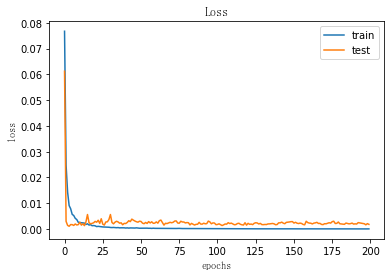

In [6]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Loss', fontsize='12',fontproperties=font)
plt.ylabel('loss', fontsize='10',fontproperties=font)
plt.xlabel('epochs', fontsize='10',fontproperties=font)
plt.legend()
#plt.savefig('loss_20.png')
plt.show()

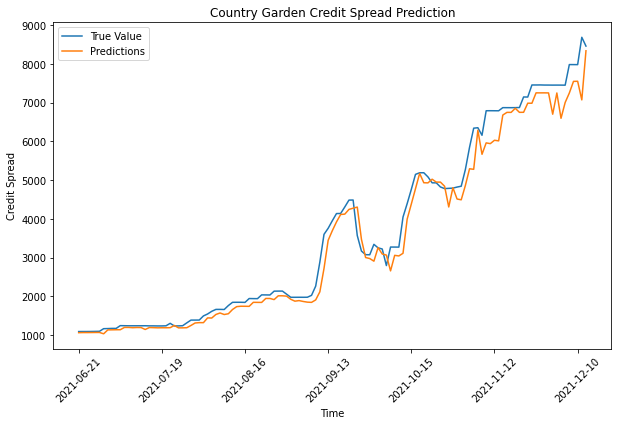

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(time_data[len(time_data) - len(y_test):]), y_test, label='True Value')
plt.plot(np.array(time_data[len(time_data) - len(y_test):]), predictions, label='Predictions')
plt.title('Country Garden Credit Spread Prediction')
plt.xlabel('Time')
plt.ylabel('Credit Spread')

# Setting the x-axis ticks
tick_interval = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_interval))

plt.xticks(rotation=45)
plt.legend()
plt.show()